In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
complete_data = pd.merge(ride_data, city_data, on = "city")
# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
complete_data_df = pd.DataFrame(complete_data)
print(complete_data_df)

                    city                 date   fare        ride_id  \
0     Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   
5     Lake Jonathanshire  2018-04-06 11:30:32  16.84  6164453571846   
6     Lake Jonathanshire  2018-03-21 00:18:34  37.95  8353656732934   
7     Lake Jonathanshire  2018-01-28 00:07:00   5.67  9756573174778   
8     Lake Jonathanshire  2018-01-24 12:24:22  34.65  3319117904437   
9     Lake Jonathanshire  2018-03-24 16:27:49  14.94  1670908453476   
10    Lake Jonathanshire  2018-04-11 22:10:30  12.81  5999870428814   
11    Lake Jonathanshire  2018-01-23 21:43:16  21.11  7711472105447   
12    Lake Jonathanshire  2018-01-29 00:19:07  41.05  6649692036139   
13    

## Bubble Plot of Ride Sharing Data

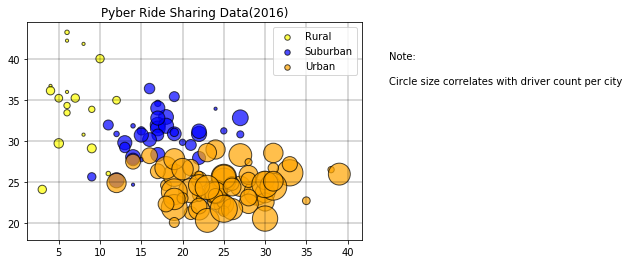

In [4]:
# Obtain the x and y coordinates for each of the three city types
rural_df = complete_data_df.groupby("type").get_group("Rural")
suburban_df = complete_data_df.groupby("type").get_group("Suburban")
urban_df = complete_data_df.groupby("type").get_group("Urban")
rural_x = rural_df.groupby("city").count()["ride_id"]
#print(rural_df.groupby("city").mean()["driver_count"])
rural_y = rural_df.groupby("city").mean()["fare"]
rural_s = rural_df.groupby("city").mean()["driver_count"]
suburban_x = suburban_df.groupby("city").count()["ride_id"]
suburban_y = suburban_df.groupby("city").mean()["fare"]
suburban_s = suburban_df.groupby("city").mean()["driver_count"]
urban_x = urban_df.groupby("city").count()["ride_id"]
urban_y = urban_df.groupby("city").mean()["fare"]
urban_s = urban_df.groupby("city").mean()["driver_count"]
# Build the scatter plots for each city types
fig = plt.figure()
city_plot = fig.add_subplot(111)
city_plot.scatter(rural_x, rural_y, c = "yellow", edgecolor = "k", s = rural_s*10, alpha = 0.7, label = "Rural")
city_plot.scatter(suburban_x, suburban_y, c = "blue", edgecolor = "k", s = suburban_s*10, alpha = 0.7, label = "Suburban")
city_plot.scatter(urban_x, urban_y, c = "orange", edgecolor = "k", s = urban_s*10, alpha = 0.7, label = "Urban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.axhline(20, alpha = 0.2, color = "k")
plt.axhline(25, alpha = 0.2, color = "k")
plt.axhline(30, alpha = 0.2, color = "k")
plt.axhline(35, alpha = 0.2, color = "k")
plt.axhline(40, alpha = 0.2, color = "k")
plt.axvline(5, alpha = 0.2, color = "k")
plt.axvline(10, alpha = 0.2, color = "k")
plt.axvline(15, alpha = 0.2, color = "k")
plt.axvline(20, alpha = 0.2, color = "k")
plt.axvline(25, alpha = 0.2, color = "k")
plt.axvline(30, alpha = 0.2, color = "k")
plt.axvline(35, alpha = 0.2, color = "k")
plt.axvline(40, alpha = 0.2, color = "k")
# Create a legend
lgnd = plt.legend(loc = "upper right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(45, 40, "Note:")
plt.text(45, 37, "Circle size correlates with driver count per city")
# Save Figure
plt.savefig("Pyber Ride Sharing Data(2016)")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

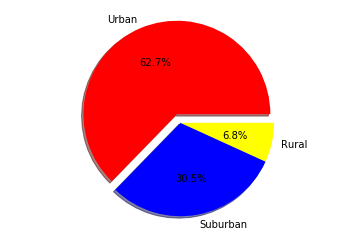

<Figure size 432x288 with 0 Axes>

In [17]:
# Calculate Type Percents
urban_fare = urban_df["fare"].sum()
#print(urban_fare)
suburban_fare = suburban_df["fare"].sum()
#print(suburban_fare)
rural_fare = rural_df["fare"].sum()
#print(rural_fare)
# Build Pie Chart
labels = ["Urban", "Suburban","Rural"]
sizes = [urban_fare, suburban_fare, rural_fare]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.axis("equal")
#plt.show()
# Save Figure
plt.savefig("Total Fares by City Type")

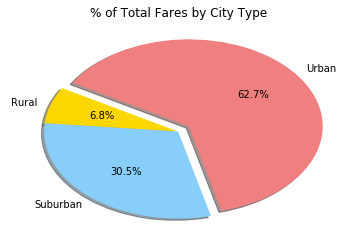

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

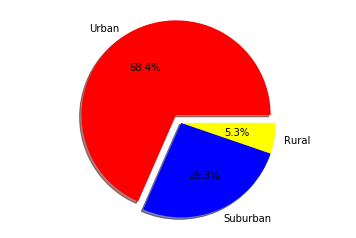

In [19]:
# Calculate Ride Percents
urban_ride = urban_df["ride_id"].count()
#print(urban_ride)
suburban_ride = suburban_df["ride_id"].count()
#print(suburban_ride)
rural_ride = rural_df["ride_id"].count()
#print(rural_ride)
# Build Pie Chart
labels = ["Urban", "Suburban","Rural"]
sizes = [urban_ride, suburban_ride, rural_ride]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.axis("equal")
# Save Figure
plt.savefig("Total Rides by City Type")
#plt.show()

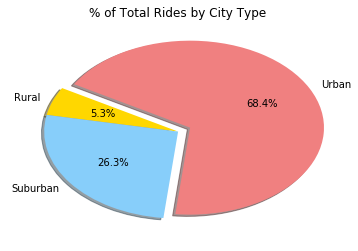

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

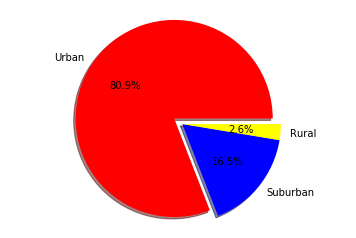

In [24]:
# Calculate Driver Percents
urban_driver = sum(urban_s)
#print(urban_driver)
suburban_driver = sum(suburban_s)
#print(suburban_driver)
rural_driver = sum(rural_s)
#print(rural_driver)
# Build Pie Charts
labels = ["Urban", "Suburban","Rural"]
sizes = [urban_driver, suburban_driver, rural_driver]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.axis("equal")
# Save Figure
plt.savefig("Total Drivers by City Type")
#plt.show()

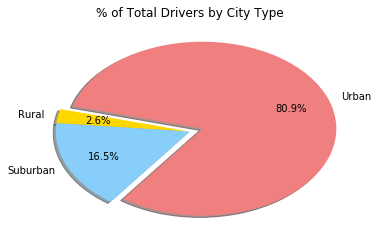

In [6]:
# Show Figure
plt.show()